In [1]:
import numpy as np
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
figlist = []
#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                   
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'lines.linewidth': 2.0}
pylab.rcParams.update(params)
#********************************************************************************************************

In [2]:
ISS = np.loadtxt('ISS_Trans_Spec_IL_09-03-2020_145442.txt')
ISSx = np.loadtxt('ISS_Trans_Spec_IL_Exchanged_09-03-2020_163314.txt')
ISSSR = np.loadtxt('ISS_Trans_Spec_IL_SR785Noise_09-03-2020_161523.txt')

Text(0.5, 1.0, 'Comparision of in-loop RIN on exchanging FSS')

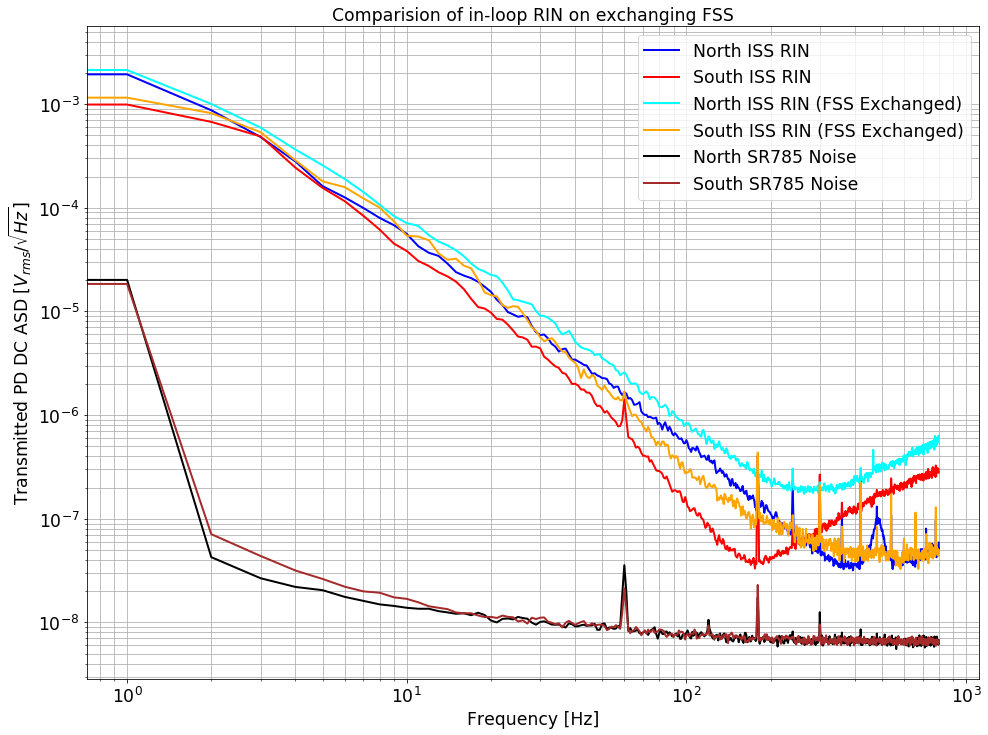

In [5]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca()
ax.loglog(ISS[:, 0], ISS[:, 1], label = 'North ISS RIN', color='blue')
ax.loglog(ISS[:, 0], ISS[:, 2], label = 'South ISS RIN', color='red')
ax.loglog(ISSx[:, 0], ISSx[:, 1], label = 'North ISS RIN (FSS Exchanged)', color='cyan')
ax.loglog(ISSx[:, 0], ISSx[:, 2], label = 'South ISS RIN (FSS Exchanged)', color='orange')
ax.loglog(ISSSR[:, 0], ISSSR[:, 1], label = 'North SR785 Noise', color='black')
ax.loglog(ISSSR[:, 0], ISSSR[:, 2], label = 'South SR785 Noise', color='brown')
ax.legend()
ax.grid('on', which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Transmitted PD DC ASD [$V_{rms}/\sqrt{Hz}$]')
ax.set_title('Comparision of in-loop RIN on exchanging FSS')

In [8]:
FSS = np.loadtxt('FSS_Mixer_Spec_IL_09-03-2020_150004.txt')
FSSx = np.loadtxt('FSS_Mixer_Spec_IL_Exchanged_09-03-2020_164655.txt')
FSSSR = np.loadtxt('FSS_Mixer_Spec_IL_Exchanged_SR785Noise_09-03-2020_160507.txt')

Text(0.5, 1.0, 'Comparision of FSS Mixer Out ASD on exchanging FSS')

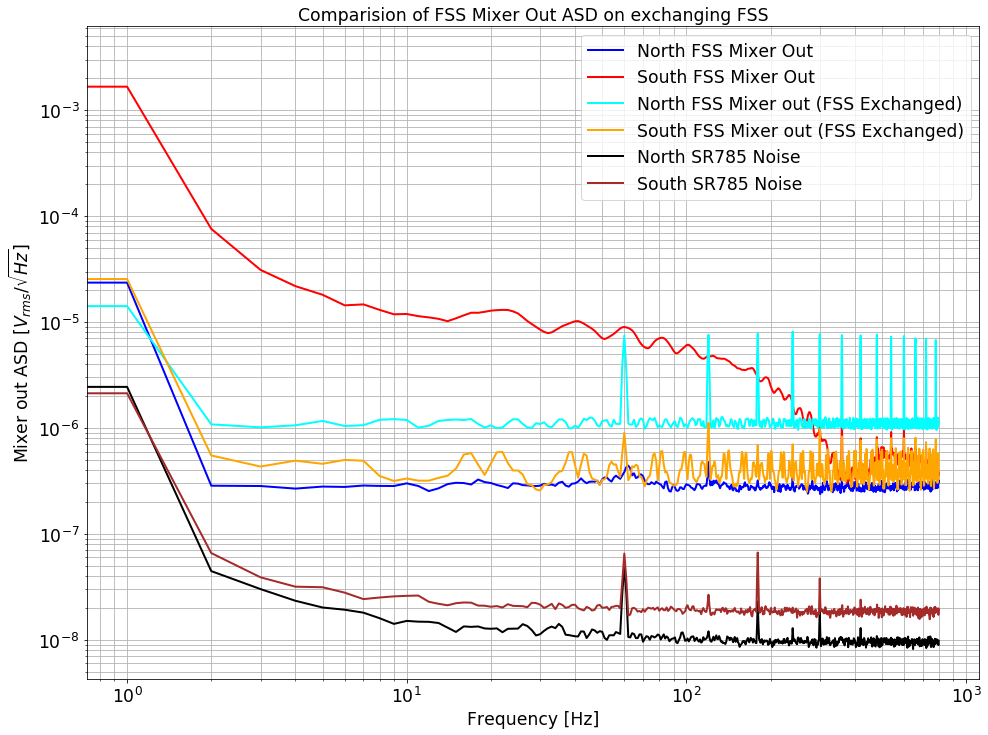

In [9]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca()
ax.loglog(FSS[:, 0], FSS[:, 1], label = 'North FSS Mixer Out', color='blue')
ax.loglog(FSS[:, 0], FSS[:, 2], label = 'South FSS Mixer Out', color='red')
ax.loglog(FSSx[:, 0], FSSx[:, 2], label = 'North FSS Mixer out (FSS Exchanged)', color='cyan')
ax.loglog(FSSx[:, 0], FSSx[:, 1], label = 'South FSS Mixer out (FSS Exchanged)', color='orange')
ax.loglog(FSSSR[:, 0], FSSSR[:, 1], label = 'North SR785 Noise', color='black')
ax.loglog(FSSSR[:, 0], FSSSR[:, 2], label = 'South SR785 Noise', color='brown')
ax.legend()
ax.grid('on', which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Mixer out ASD [$V_{rms}/\sqrt{Hz}$]')
ax.set_title('Comparision of FSS Mixer Out ASD on exchanging FSS')

In [11]:
from noiseBudgetModule import noiseBudget
nosbud = noiseBudget(lightInit=True)

Creating coating stack for the noise budget...
Run stack.HongBrownianCoeffCalculations(lam) and stack.EvanThermoOpticCoeffCalculations(lam) to calculate the coefficients required for coating brownian noise and coating thermo-optic noise calculations.


In [27]:
nosbud.loadASD('BeatnoteFSSExchangedSpectrum_20200309_162438.txt',
               key='BeatExc',
               label=' Beatnote FSS Exchanged')
nosbud.loadASD('BeatnoteNormalConfigSpectrum_20200309_172423.txt',
               key='Beat',
               label=' Beatnote Normal Configuration')

Found lower and upper bounds
Found lower and upper bounds


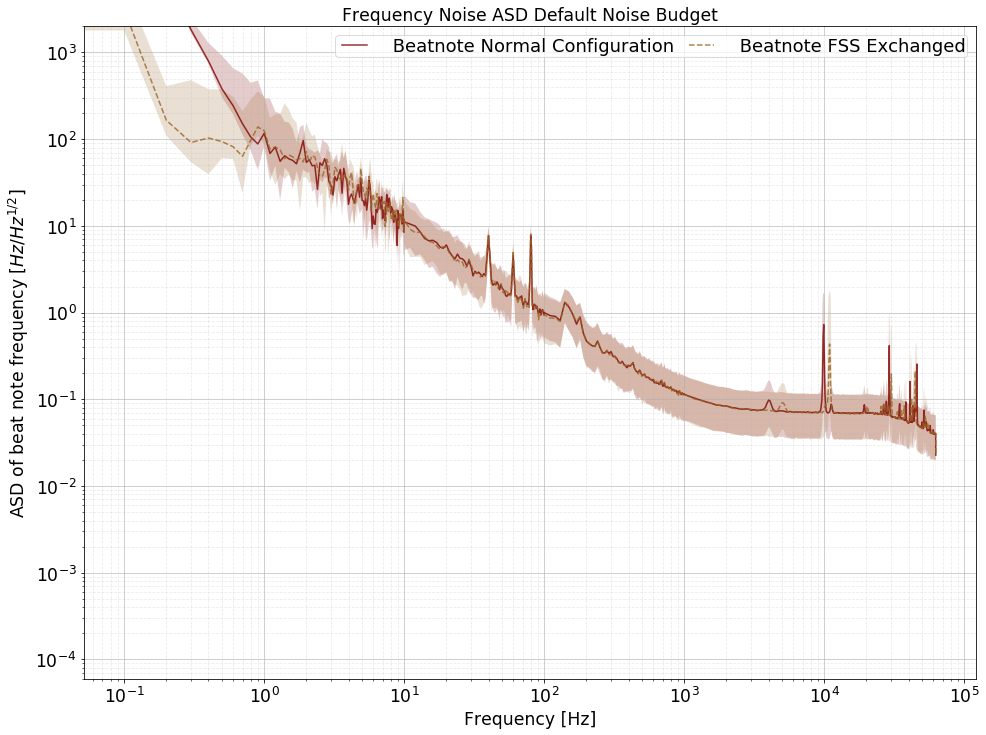

In [28]:
fig = nosbud.plotPSD(plotList=['Beat', 'BeatExc'],
                     doTotal=False,
                     savePlot = False)